<a href="https://colab.research.google.com/github/SimranS22/Simple_Linear_Regression/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION USING SUPERVISED ML**

### SIMPLE LINEAR REGRESSION

1.   Predict the percentage a student receives based on the number of hours they study
2.   What will be the predicted score if a student studies for 9.25 hours/day 


### **Task done by:**
**Simran Sharma,
Web-Development and Design Intern at The Sparks Foundation**

It is performed as an extra task for learning and experimenting purposes.

### **Step 1: Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### **Step 2: Read Dataset from URL = http://bit.ly/w-data**

In [ ]:
url="http://bit.ly/w-data"
sample_data=pd.read_csv(url)
sample_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
sample_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


##### 25 rows of data have been provided in the dataset

### **Step 3: Represent the relationship between the data by plotting a graph**

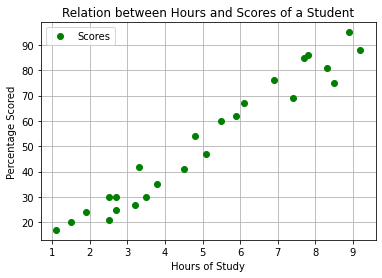

In [ ]:
sample_data.plot(x="Hours", y="Scores", style="g o")
plt.title("Relation between Hours and Scores of a Student")
plt.xlabel("Hours of Study") 
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

This graph shows us that the relationship between the two variables is a linearly increasing one.

### **Step 4: Use *corr()* method to determine actual correlation between the variables**

In [ ]:
sample_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Step 5: Retrieve Attribute(Input) Values and Label(Output) Values**

In [ ]:
#csvdataset.iloc[row, column]
x=sample_data.iloc[:, :-1].values
y=sample_data.iloc[:, 1:].values
print("X(Hours):")
print(x)
print("Y(Scores):")
print(y)

X(Hours):
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y(Scores):
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


### **Step 6: Split *sample_data* into Training & Test Sets using Scikit-Learn's *train_test_split()* method**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=50)
#The default test_size is 0.25. This means 25% of the data is testing data and 75% is training data 

### **Step 7: Train the Model**

In [ ]:
lrf=LinearRegression().fit(x_train,y_train)
print("...The Model has been trained!")

...The Model has been trained!


### **Step 8: Plot the regression line on the graph and compare it with the actual values**

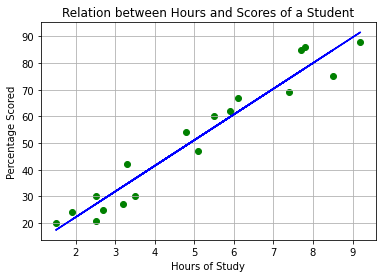

In [ ]:
#Graph of Trained Model
plt.scatter(x_train,y_train, color='green')
plt.plot(x_train, lrf.predict(x_train), color='blue')
plt.title("Relation between Hours and Scores of a Student")
plt.xlabel("Hours of Study")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

The slope of the regression is positive for the trained set, as concluded from the above graph. This means we can now predict the values on our test set.

### **Step 9: Use predict() method to predict percentage scored by student(test_set) and compare the predicted values with the actual values**

##### ***Table***

In [ ]:
y_predict=lrf.predict(x_test)
df = pd.DataFrame({'Hours of Study': x_test[:,0], 'Actual Scores': y_test[:,0], 'Predicted Scores': y_predict[:,0]})
print(df)

   Hours of Study  Actual Scores  Predicted Scores
0             8.9             95         88.672009
1             2.7             30         29.018054
2             6.9             76         69.428798
3             3.8             35         39.601820
4             1.1             17         13.623485
5             4.5             41         46.336944
6             8.3             81         82.899045


##### ***Visualization***

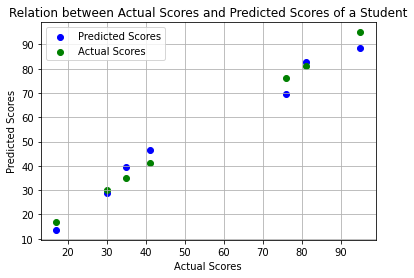

In [ ]:
plt.scatter(y_test,y_predict, color='blue')
plt.scatter(y_test, y_test, color='green')
plt.title("Relation between Actual Scores and Predicted Scores of a Student")
plt.legend(["Predicted Scores","Actual Scores"])
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.grid()
plt.show()

### **Step 10: Prediction of percentage scored by student using trained model**

In [ ]:
def pred_score(x):
  #equation of a line = y=mx+c where, m is the gradient and c is the intercept
  y=(lrf.coef_*x)+lrf.intercept_
  print("The predicted score that can be achieved if the student studies",x,"hours a day is",round(float(y),6),"%")

In [ ]:
  x=float(input("Enter Hours of Study done by Student: "))
  pred_score(x)

Enter Hours of Study done by Student: 9.25
The predicted score that can be achieved if the student studies 9.25 hours a day is 92.039571 %


### **Step 11: Model Evaluation**

##### ***Error Calculation***

In [ ]:
#Find the error between the actual values and the predicted values
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_predict))
print("Mean Squared Error: ", mean_squared_error(y_test,y_predict))

Mean Absolute Error:  4.156494887612262
Mean Squared Error:  21.265048761808725


##### ***Efficiency of the model***

In [ ]:
score=lrf.score(x_train,y_train)
print(score*100,"%")

94.18250389075631 %
